In [6]:
from sympy import *
from IPython.display import display
init_printing()
import numpy as np


# Connection with projective invariants
I want to understand how we can look at projective transformations as linear transformations in a one dimensionally higher space. 

So, start with a function of one variable
\begin{equation}
    f(p)
\end{equation}
We want to construct from this a function of two variables. Now, we have some choice here, possibly depending on the degree of derivatives that we want to use in our invariants. Currently going on a hunch
\begin{align*}
    g(x, y) &= f\left(\frac{x}{y}\right) \\
    g(x, y) &= y f\left(\frac{x}{y}\right) \\
    g(x, y) &= y^2 f\left(\frac{x}{y}\right)
\end{align*}
etc

In [120]:
# Random transformation
A = np.random.rand(2,2)
A = A / np.linalg.det(A)
A

array([[ 6.378274  ,  0.05682866],
       [ 8.28393826,  1.42746795]])

In [ ]:
from sympy import binomial

In [85]:
f = Function('f')
g = Function('g')
x, y, z, w = symbols('x y z w')


In [103]:
class myfun:
    def __init__(self, fun, n=None):
        if n is None:
            self.n = len(inspect.signature(fun).parameters)
        else:
            self.n = n
        self.fun = fun
    
    def __call__(self, *args):
        return self.fun(*args)
        

def otimes(f, g):
    if not isinstance(f, myfun):
        f = myfun(f)
    if not isinstance(g, myfun):
        g = myfun(g)
        
    def combine(*args):
        return f(*args[0:f.n])*g(*args[f.n:f.n+g.n])
    
    return myfun(combine, f.n + g.n)

def trace(f):
    if not isinstance(f, myfun):
        n = len(inspect.signature(f).parameters)
    else:
        n = f.n
    print(n)
    
    x, y = symbols('x y')
    def outfun(x, y):
        args = []
        print(n/2)
        for k in range(int(n/2)):
            args += [x, y]
        return f(*args)
    return myfun(outfun, 2)
       

In [104]:
fn = myfun(f, 2)
gn = myfun(g, 2)
trace(otimes(fn, gn))(x, y)


4
2.0


In [56]:
# Following the development of Partial Transvectants in Classical Invariant Theory (Olver Chapter 5)

# Basic object is a function of two variables
# Can be multiplied together using otimes to make a function of 
from inspect import signature
def otimes(fun_list):
    """
    Input: list of n functions of two variables [f_1, f_2, ... , f_n]
    Returns: function of 2n variables f1(x_1, y_1)*f2(x_2, y_2)* ... * fn(x_n, y_n)
    """
    n = len(fun_list)
    def out_fun(*args):
        out = 1
        for idx in range(n):
            out *= fun_list[idx](args[2*idx], args[2*idx+1])
        return(out)
    
    return out_fun

def trace(fun):
    n = len(signature(fun).parameters)
    print(n)

In [57]:
def foo(a, b):
    return a*b

f = otimes([foo for idx in range(4)])
print(f(1, 2, 3, 4, 5, 6, 7, 8))
trace(f)

40320
1


In [17]:
# Set up the transvectant operation
from sympy import binomial
def transvectant(Q, R, r):
    """
    Usage: transvectant(Q, R, r)
        Q, R are functions of two variables
        r is the transvectant degree
        
    Returns:
        A function of two variables
    """
    x, y = symbols('x y')
    
    t = 0
    for i in range(r+1):
        t += (-1)**i * (binomial(r, i) * 
                        diff(diff(Q(x, y), x, r - i), y, i) *
                        diff(diff(R(x, y), x, i), y, r - i))
    return lambda u, v: t.subs([(x, u), (y, v)])


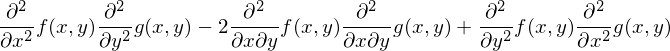

In [9]:
transvectant(f, g, 2)(x, y)

In [44]:
x, y = symbols('x y')
def fun(p):
    return exp(-sin(p))

a = 1
b = 0
c = 1
d = 1
def funbar(p):
    return fun((a*p + b)/(c*p + d))
def g(x, y):
    return fun(x/y)
def gbar(x, y):
    return funbar(x/y)

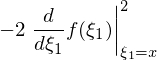

In [70]:
f = Function('f')
p = symbols('p')
def g(x, y):
    return f(x/y)
def fbar(p):
    return f((a*p + b)/(c*p + d))
def gbar(x, y):
    return y**y*fbar(x/y)
simplify(transvectant(g, g, 2)(x, 1))

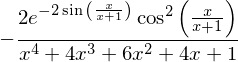

In [45]:
I0 = simplify(transvectant(g, g, 2)(x, 1)

display(simplify(transvectant(g, g, 2)(x, 1)))
display(simplify(transvectant(gbar, gbar, 2)(x, 1)))



xx = np.linspace(-2, 2)


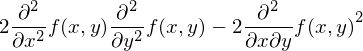

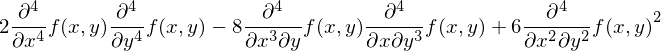

In [12]:


R_0 = transvectant(f, f, 0)
R_1 = transvectant(f, f, 2)
R_2 = transvectant(f, f, 4)
QR1_0 = transvectant(f, R_0, 1)
QR1_1 = transvectant(f, R_1, 1)

display(R_0(x, y))
display(R_1(x, y))
display(R_2(x, y))
#display(QR1_1(x, y))